In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import plotly.express as px

In [53]:
df = pd.read_csv('Clenead/exploratory_data_analisis.csv')

In [54]:
df

,customer_unique_id,number_order_item,review_score,average_payment_order,last_purchase_by_order,late_delivered_days,last_purchase_days,nb_order,log_average_payment_order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,5.0,141.90,2018-05-10 10:56:27,-5,111,1,4.962145
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.0,27.19,2018-05-07 11:11:27,-5,114,1,3.338967
2,0000f46a3911fa3c0805444483337064,1,3.0,86.22,2017-03-10 21:05:03,-2,536,1,4.468434
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.0,43.62,2017-10-12 20:29:41,-12,320,1,3.798182
4,0004aac84e0df4da2b147fca70cf8255,1,5.0,196.89,2017-11-14 19:45:42,-8,287,1,5.287711
...,...,...,...,...,...,...,...,...,...
90581,fffcf5a5ff07b0908bd4e2dbc735a684,1,5.0,919.14,2017-06-08 21:00:36,-27,446,1,6.824526
90582,fffea47cd6d3cc0a88bd621562a9d061,1,4.0,84.58,2017-12-10 20:07:56,-3,261,1,4.449452
90583,ffff371b4d645b6ecea244b27531430a,1,5.0,112.46,2017-02-07 15:49:16,-30,567,1,4.731450
90584,ffff5962728ec6157033ef9805bacc48,1,5.0,133.69,2018-05-02 15:17:41,-14,118,1,4.902976


#### Evaluation de l'évolution du modèle avec le Adjusted Rand Index

In [55]:
# Date de la plus ancienne et de la plus récente commande 2017-09-28 15:00:27

df.last_purchase_by_order.min(), df.last_purchase_by_order.max()

('2016-10-03 16:56:50', '2018-08-29 15:00:37')

In [56]:
df.loc[df.last_purchase_by_order == df.last_purchase_by_order.min()]

,customer_unique_id,number_order_item,review_score,average_payment_order,last_purchase_by_order,late_delivered_days,last_purchase_days,nb_order,log_average_payment_order
16851,2f64e403852e6893ae37485d5fcacdaf,1,4.0,39.09,2016-10-03 16:56:50,-11,694,1,3.691127


In [57]:
def pipe(n_clusters, scaler):

    kmeans = KMeans(init = 'k-means++',n_clusters = n_clusters) 
    
    estimator = make_pipeline(scaler, kmeans)
    
    return estimator

In [58]:
df.last_purchase_days.max()

694

In [59]:
# df_M0 récupère toutes les commandes de 2016-10-03 au 

df_M0 = df.loc[df.last_purchase_days > 328]
df_M0

,customer_unique_id,number_order_item,review_score,average_payment_order,last_purchase_by_order,late_delivered_days,last_purchase_days,nb_order,log_average_payment_order
2,0000f46a3911fa3c0805444483337064,1,3.0,86.22,2017-03-10 21:05:03,-2,536,1,4.468434
8,0005e1862207bf6ccc02e4228effd9a0,1,4.0,150.12,2017-03-04 23:32:12,-28,542,1,5.018074
10,0006fdc98a402fceb4eb0ee528f6a8d4,1,3.0,29.00,2017-07-18 09:23:10,-12,407,1,3.401197
14,000a5ad9c4601d2bbdd9ed765d5213b3,1,4.0,91.28,2017-08-11 13:45:15,-15,383,1,4.524827
15,000bfa1d2f1a41876493be685390d6d3,2,4.5,46.85,2017-09-29 14:46:58,-13,334,1,3.868071
...,...,...,...,...,...,...,...,...,...
90573,fff3a9369e4b7102fab406a334a678c3,1,5.0,102.74,2017-08-11 10:26:38,-7,383,1,4.641888
90576,fff699c184bcc967d62fa2c6171765f7,1,4.0,55.00,2017-09-01 17:06:54,-7,361,1,4.025352
90581,fffcf5a5ff07b0908bd4e2dbc735a684,1,5.0,919.14,2017-06-08 21:00:36,-27,446,1,6.824526
90583,ffff371b4d645b6ecea244b27531430a,1,5.0,112.46,2017-02-07 15:49:16,-30,567,1,4.731450


In [60]:
df.last_purchase_days.max()

694

In [61]:
df_M0.last_purchase_days.max()

694

In [62]:
df_M0.last_purchase_by_order.max(), df_M0.last_purchase_by_order.min()

('2017-10-04 14:43:07', '2016-10-03 16:56:50')

In [63]:
jour_ = df_M0.last_purchase_days.min()
jour_

329

In [64]:
df.loc[df.last_purchase_days > 298].last_purchase_by_order.max()

'2017-11-03 14:50:46'

In [65]:
# création de nouveau df avec un ajout de 1 mois pour l'analyse du comportement des achats clients

Dataframe = []

while(jour_ > 0):
    
    jour_ -=  31
    Dataframe.append(df.loc[df.last_purchase_days > jour_])
    
len(Dataframe)

11

In [66]:
df_M1 = Dataframe[0]
df_M2 = Dataframe[1]
df_M3 = Dataframe[2]
df_M4 = Dataframe[3]
df_M5 = Dataframe[4]
df_M6 = Dataframe[5]
df_M7 = Dataframe[6]
df_M8 = Dataframe[7]
df_M9 = Dataframe[8]
df_M10 = Dataframe[9]
df_M11 = Dataframe[10]
#df_M12 = Dataframe[11]

print(f'df_M0, date_recente :  {df_M0.last_purchase_by_order.max()}, date_ancienne :  {df_M0.last_purchase_by_order.min()}')


i = 1
for DF in Dataframe:
    print(f'df_M{i}, date_recente :  {DF.last_purchase_by_order.max()}, date_ancienne :  {DF.last_purchase_by_order.min()}')
    i += 1

df_M0, date_recente :  2017-10-04 14:43:07, date_ancienne :  2016-10-03 16:56:50
df_M1, date_recente :  2017-11-03 14:50:46, date_ancienne :  2016-10-03 16:56:50
df_M2, date_recente :  2017-12-04 14:59:26, date_ancienne :  2016-10-03 16:56:50
df_M3, date_recente :  2018-01-04 14:57:28, date_ancienne :  2016-10-03 16:56:50
df_M4, date_recente :  2018-02-04 14:54:53, date_ancienne :  2016-10-03 16:56:50
df_M5, date_recente :  2018-03-07 14:59:13, date_ancienne :  2016-10-03 16:56:50
df_M6, date_recente :  2018-04-07 14:56:02, date_ancienne :  2016-10-03 16:56:50
df_M7, date_recente :  2018-05-08 14:53:17, date_ancienne :  2016-10-03 16:56:50
df_M8, date_recente :  2018-06-08 14:59:48, date_ancienne :  2016-10-03 16:56:50
df_M9, date_recente :  2018-07-09 14:59:01, date_ancienne :  2016-10-03 16:56:50
df_M10, date_recente :  2018-08-09 14:59:56, date_ancienne :  2016-10-03 16:56:50
df_M11, date_recente :  2018-08-29 15:00:37, date_ancienne :  2016-10-03 16:56:50


In [67]:
df_M0.last_purchase_by_order.max(),df_M0.last_purchase_by_order.min()

('2017-10-04 14:43:07', '2016-10-03 16:56:50')

#### 2.1 Evaluation du score

- evaluation du comportement client par rapport à leurs achats antérieurs 

In [68]:
# analyse le compoortement des achats clients sur une année

scaled = StandardScaler()

# df_stand_M0['log_average_payment_order'] = np.log1p(df_stand_M0.average_payment_order.values)

var_RFM = ['nb_order',
           'review_score',
           'late_delivered_days',
           'last_purchase_days',
           'log_average_payment_order']

E0 = pipe(4,scaled)

E0.fit(df_M0[var_RFM])

df_M0['cluster'] = E0.predict(df_M0[var_RFM])


C:\Users\Dragomir\AppData\Local\Temp\ipykernel_7804\4080212165.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M0['cluster'] = E0.predict(df_M0[var_RFM])


In [69]:
ARI_M0 = 1
df_list = [df_M1,df_M2,df_M3,df_M4,df_M5,df_M6,df_M7,df_M8,df_M9,df_M10]
clust_list = []
score_ARI = []
date_df = []
score_ARI.append(1)
date_df.append(df_M0.last_purchase_by_order.max())

In [70]:
df

,customer_unique_id,number_order_item,review_score,average_payment_order,last_purchase_by_order,late_delivered_days,last_purchase_days,nb_order,log_average_payment_order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,5.0,141.90,2018-05-10 10:56:27,-5,111,1,4.962145
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.0,27.19,2018-05-07 11:11:27,-5,114,1,3.338967
2,0000f46a3911fa3c0805444483337064,1,3.0,86.22,2017-03-10 21:05:03,-2,536,1,4.468434
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.0,43.62,2017-10-12 20:29:41,-12,320,1,3.798182
4,0004aac84e0df4da2b147fca70cf8255,1,5.0,196.89,2017-11-14 19:45:42,-8,287,1,5.287711
...,...,...,...,...,...,...,...,...,...
90581,fffcf5a5ff07b0908bd4e2dbc735a684,1,5.0,919.14,2017-06-08 21:00:36,-27,446,1,6.824526
90582,fffea47cd6d3cc0a88bd621562a9d061,1,4.0,84.58,2017-12-10 20:07:56,-3,261,1,4.449452
90583,ffff371b4d645b6ecea244b27531430a,1,5.0,112.46,2017-02-07 15:49:16,-30,567,1,4.731450
90584,ffff5962728ec6157033ef9805bacc48,1,5.0,133.69,2018-05-02 15:17:41,-14,118,1,4.902976


In [71]:
""" Le but de cette fonction est d'avaluer la similarité de scluster en utilisant l'indice de rand ajusté.
Je prédit les données du modèle M(1,2,3...) avec le pipeline E0 dans sur lequel 
j'ai déja entrainé les données du df_M0 datant de ('2017-10-04 14:43:07', '2016-10-03 16:56:50').
J'utilise le ARI score qui évalue la concordance des deux cluster prédis EO et EV ( qui n'est autre df_M1,df_M2 ...)"""

i = 1

for df_Modele in df_list:
    
    print(f'prediction des cluster E0_M{i} et des cluster E{i}_M{i}')
    # instanciation du pipeline(cluster_kmeans,standarisation)
    EV = pipe(4,scaled)
    # standardise et crée 4 cluster
    EV.fit(df_Modele[var_RFM])
    
    cluster_pred = EV.predict(df_Modele[var_RFM])
    cluster_E0 = E0.predict(df_Modele[var_RFM])
    # calucul de l'ARI score
    score_ARI.append(adjusted_rand_score(cluster_E0, cluster_pred))
    clust_list.append(cluster_pred)
    date_df.append(df_Modele.last_purchase_by_order.max())
    i+=1
    

prediction des cluster E0_M1 et des cluster E1_M1
prediction des cluster E0_M2 et des cluster E2_M2
prediction des cluster E0_M3 et des cluster E3_M3
prediction des cluster E0_M4 et des cluster E4_M4
prediction des cluster E0_M5 et des cluster E5_M5
prediction des cluster E0_M6 et des cluster E6_M6
prediction des cluster E0_M7 et des cluster E7_M7
prediction des cluster E0_M8 et des cluster E8_M8
prediction des cluster E0_M9 et des cluster E9_M9
prediction des cluster E0_M10 et des cluster E10_M10


In [72]:
# Les scores obtenue entre le modele df_M0 qui est de 1  et df_M0 et (df_M1, df_M2...)  
score_ARI

[1,
 0.9829594651898792,
 0.9238826731565912,
 0.9260028327214461,
 0.9211196610705614,
 0.895772422111282,
 0.8719383603090638,
 0.903177086567974,
 0.8981601398769629,
 0.8754421962105624,
 0.8502143995542613]

In [73]:
from datetime import datetime
date_df = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in date_df]
date_df

[datetime.datetime(2017, 10, 4, 14, 43, 7),
 datetime.datetime(2017, 11, 3, 14, 50, 46),
 datetime.datetime(2017, 12, 4, 14, 59, 26),
 datetime.datetime(2018, 1, 4, 14, 57, 28),
 datetime.datetime(2018, 2, 4, 14, 54, 53),
 datetime.datetime(2018, 3, 7, 14, 59, 13),
 datetime.datetime(2018, 4, 7, 14, 56, 2),
 datetime.datetime(2018, 5, 8, 14, 53, 17),
 datetime.datetime(2018, 6, 8, 14, 59, 48),
 datetime.datetime(2018, 7, 9, 14, 59, 1),
 datetime.datetime(2018, 8, 9, 14, 59, 56)]

### Information sur l'ARI (Indice de Rand ajusté)

- L'ARI est une mesure d'avaluation utilisé pour quantifier la similarité entre deux clusters
- Un score proche de 1 alors les deux cluster évaluer seront similaire
- Un score proche de zéro alors nous avons répartition hazardeuse des clusters
- Un score équivalent à -1 alors les données des  clusters ne sont pas concordante

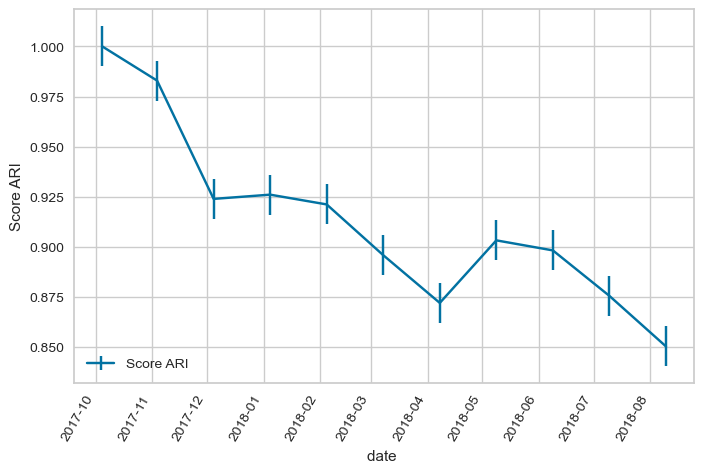

In [74]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

fig, ax = plt.subplots()

x = date_df

yerr = 0.01

ax.errorbar(x, score_ARI, yerr=yerr, label='Score ARI')

ax.set_xlabel('date ')

ax.set_ylabel('Score ARI')

#ax.set_xlim(date_df[0],date_df[-1])

fig.autofmt_xdate(rotation=60)

plt.legend(loc='lower left')

plt.show()

In [75]:
jour_ = df_M0.last_purchase_days.min()
jour_

329

In [76]:
df.columns

Index(['customer_unique_id', 'number_order_item', 'review_score',
       'average_payment_order', 'last_purchase_by_order',
       'late_delivered_days', 'last_purchase_days', 'nb_order',
       'log_average_payment_order'],
      dtype='object')

In [77]:
# création de nouveau df avec un ajout de 1 mois pour l'analyse du comportement des achats clients
# Pourquoi avoir choisi d'entrainer vos cluster sur une année ? Cette année-ci était prolifique en terme de chiffre d'affaire

Dataframe = []

while(jour_ > 0):
    
    jour_ -=  90
    print(jour_)
    Dataframe.append(df.loc[df.last_purchase_days > jour_])
    
len(Dataframe)

239
149
59
-31


4

In [78]:
df_M1 = Dataframe[0]
df_M2 = Dataframe[1]
df_M3 = Dataframe[2]
df_M4 = Dataframe[3]

i = 1

for DF in Dataframe:
    print(f'df_M{i}, date_recente :  {DF.last_purchase_by_order.max()}, date_ancienne :  {DF.last_purchase_by_order.min()}')
    i += 1

df_M1, date_recente :  2018-01-01 14:54:19, date_ancienne :  2016-10-03 16:56:50
df_M2, date_recente :  2018-04-01 14:57:38, date_ancienne :  2016-10-03 16:56:50
df_M3, date_recente :  2018-06-30 14:52:27, date_ancienne :  2016-10-03 16:56:50
df_M4, date_recente :  2018-08-29 15:00:37, date_ancienne :  2016-10-03 16:56:50


In [79]:
ARI_M0 = 1
df_list = [df_M1,df_M2,df_M3,df_M4]
clust_list = []
score_ARI = []
date_df = []
score_ARI.append(1)
date_df.append(df_M0.last_purchase_by_order.max())

In [80]:
i = 1
for df_Modele in df_list:
    
    print(f'prediction des cluster M0_M{i}')
    # instanciation du pipeline(cluster_kmeans,standarisation)
    Ev = pipe(4,scaled)
    # Ev.fit standardise et crée 4 cluster
    Ev.fit(df_Modele[var_RFM])
    cluster_pred = Ev.predict(df_Modele[var_RFM])
    cluster_E0 = E0.predict(df_Modele[var_RFM])
    score_ARI.append(adjusted_rand_score(cluster_E0, cluster_pred))
    clust_list.append(cluster_pred)
    date_df.append(df_Modele.last_purchase_by_order.max())

    i+=1
    

prediction des cluster M0_M1
prediction des cluster M0_M2
prediction des cluster M0_M3
prediction des cluster M0_M4


In [81]:
score_ARI

[1,
 0.9272173601856883,
 0.8745472265243661,
 0.8793983856116918,
 0.8160696371545345]

In [82]:
date_df = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in date_df]
date_df

[datetime.datetime(2017, 10, 4, 14, 43, 7),
 datetime.datetime(2018, 1, 1, 14, 54, 19),
 datetime.datetime(2018, 4, 1, 14, 57, 38),
 datetime.datetime(2018, 6, 30, 14, 52, 27),
 datetime.datetime(2018, 8, 29, 15, 0, 37)]

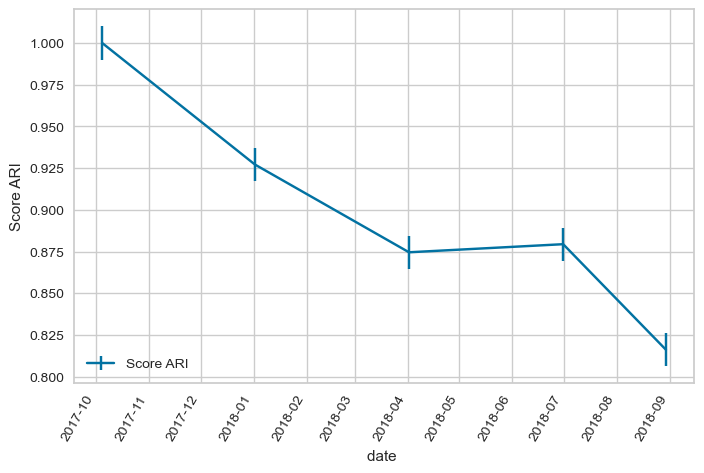

In [83]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange


fig, ax = plt.subplots()

x = date_df

yerr = 0.01

ax.errorbar(x, score_ARI, yerr=yerr, label='Score ARI')

ax.set_xlabel('date ')

ax.set_ylabel('Score ARI')

fig.autofmt_xdate(rotation=60)

plt.legend(loc='lower left')

plt.show()